# Pergunta 2

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import folium
import numpy as np
from folium.plugins import HeatMap

redlist_df = pd.read_csv("../../redlist_species_data_83aad1b1-09d6-4283-b629-0ccacb10797b/assessments.csv")
redlist_df

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,...,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,495630,10030,Hexanchus griseus,Near Threatened,A2bd,2020,2019-11-21 00:00:00 UTC,3.1,English,<p>The&#160;Bluntnose Sixgill Shark (<em>Hexan...,...,Decreasing,"The Bluntnose Sixgill Shark has a widespread, ...","<p>The species is utilized for its meat, liver...",Marine,"<p>Since 2010, the European Union Fisheries Co...",NaN,NaN,False,False,Global
1,495907,10041,Heosemys annandalii,Critically Endangered,A2cd+4cd,2021,2018-03-13 00:00:00 UTC,3.1,English,<p><em>Heosemys annandalii</em> is considered ...,...,Decreasing,<p>The range of <em>Heosemys annandalii</em> i...,The species is collected for local consumption...,Terrestrial|Freshwater (=Inland waters),<p><em>Heosemys annandalii </em>is included in...,Indomalayan,NaN,False,False,Global
2,497499,132523146,Hubbsina turneri,Critically Endangered,"B1ab(i,ii,iii,iv)+2ab(i,ii,iii,iv)",2019,2018-04-17 00:00:00 UTC,3.1,English,The Highland Splitfin is now only known to be ...,...,Decreasing,The Highland Splitfin is a freshwater fish spe...,The Highland Splitfin is not a target species ...,Freshwater (=Inland waters),No conservation actions targeting&#160;<em>Hub...,Neotropical,NaN,False,False,Global
3,497550,10267,Hungerfordia pelewensis,Endangered,"B1ab(ii,iii)+2ab(ii,iii)",2012,2011-08-22 00:00:00 UTC,3.1,English,"<p><span lang=""EN-US"">In recent surveys, the s...",...,Unknown,"<p><span lang=""EN-US"">This is a land snail end...",This species is not utilized.,Terrestrial,<p> </p><p> </p><p>Field work to define the ...,Oceanian,NaN,False,False,Global
4,498476,10769,Ictalurus mexicanus,Vulnerable,D2,2019,2018-12-06 00:00:00 UTC,3.1,English,<em>I. mexicanus </em>is herein categorized as...,...,Unknown,<p><em>Ictalurus mexicanus</em> is a species e...,This species is not utilised or traded.,Freshwater (=Inland waters),"<p>In Mexico,&#160;<em>Ictalurus mexicanus</em...",Neotropical,NaN,False,False,Global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50245,197564498,64563550,Filicium thouarsianum,Near Threatened,"B2ab(i,ii,iii)",2020,2020-03-28 00:00:00 UTC,3.1,English,<em>Filicium</em> <em>thouarsianum </em>is<em>...,...,Decreasing,<em>Filicium</em> <em>thouarsianum</em>&#160;i...,There is no reported use information for the s...,Terrestrial,"The species occurs in <span class=""ItemText"">A...",Afrotropical,NaN,False,False,Global
50246,197565732,46486,Melanophylla angustior,Endangered,"A3c; B2ab(ii,iii,v)",2020,2020-06-17 00:00:00 UTC,3.1,English,"<em>Melanophylla</em> <em>angustior,</em> smal...",...,Decreasing,<em>Melanophylla</em> <em>angustior</em> endem...,There is no reported use information of this s...,Terrestrial,There are two subpopulations known for the spe...,Afrotropical,NaN,False,False,Global
50247,197569838,46489,Melanophylla madagascariensis,Endangered,B1ab(iii)+2ab(iii),2020,2020-03-26 00:00:00 UTC,3.1,English,<em><em><em><em>Melanophylla</em> <em>madagasc...,...,Decreasing,<em>Melanophylla</em> <em>madagascariensis </e...,There is no reported use information for this ...,Terrestrial,One known subpopulation is recorded within Bet...,Afrotropical,NaN,False,False,Global
50248,197570616,46490,Melanophylla modestei,Endangered,"A3c; B2ab(ii,iii,iv,v)",2020,2020-03-25 00:00:00 UTC,3.1,English,<em>Melanophylla</em> <em>modestei </em>is a t...,...,Decreasing,<em>Melanophylla</em> <em>modestei </em>is end...,There is no reported use information for this ...,Terrestrial,The species is known from Makira and Masoala p...,Afrotropical,NaN,False,False,Global


In [4]:
interactions_df = pd.read_csv('../../clean-interactions.csv')
interactions_df

,sourceTaxonSpeciesName,sourceTaxonKingdomName,interactionTypeName,targetTaxonSpeciesName,targetTaxonKingdomName
0,Andrena milwaukeensis,Animalia,visitsFlowersOf,Zizia aurea,Plantae
1,Andrena mandibularis,Animalia,visitsFlowersOf,Zanthoxylum americanum,Plantae
2,Andrena edwardsi,Animalia,visitsFlowersOf,Wyethia mollis,Plantae
3,Andrena mandibularis,Animalia,visitsFlowersOf,Viburnum dentatum,Plantae
4,Andrena milwaukeensis,Animalia,visitsFlowersOf,Viburnum lentago,Plantae
...,...,...,...,...,...
922800,Calyptra orthograpta,Animalia,eats,Bubalus bubalis,Animalia
922801,Calyptra orthograpta,Animalia,eats,Cervus unicolor,Animalia
922802,Calyptra orthograpta,Animalia,eats,Elephas maximus,Animalia
922803,Calyptra pseudobicolor,Animalia,eats,Homo sapiens,Animalia


In [6]:
target_category_df = interactions_df.join(redlist_df.set_index('scientificName')['redlistCategory'], on='targetTaxonSpeciesName')

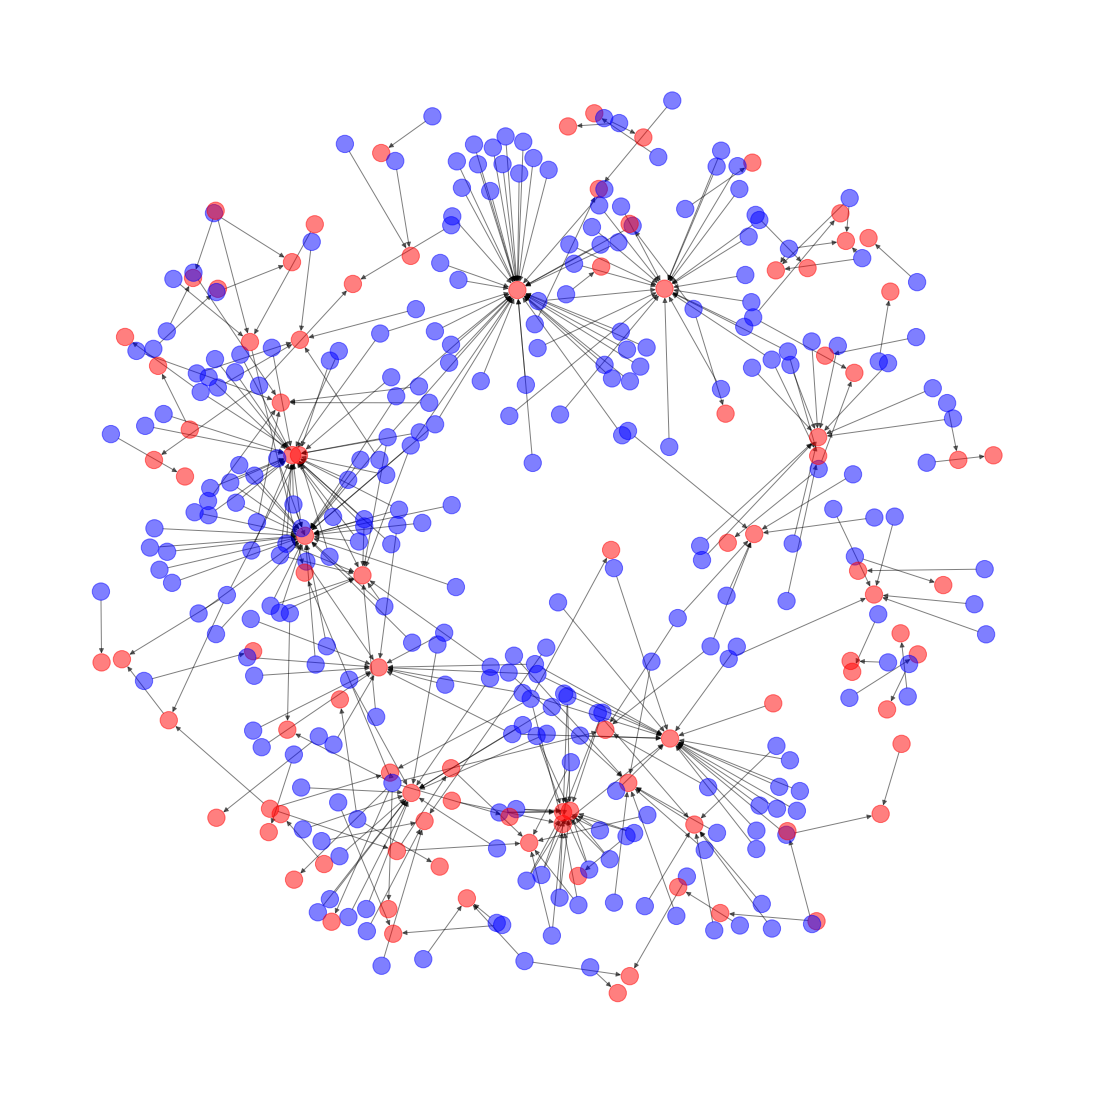

In [12]:
df1 = target_category_df.query("redlistCategory == 'Critically Endangered' and interactionTypeName == 'eats' and sourceTaxonSpeciesName != `targetTaxonSpeciesName`")[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']]
df1.drop_duplicates(subset=None, keep="first", inplace=True)

G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')
G = nx.DiGraph(G)

plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

#pos = nx.spring_layout(G, k=0.2)

colors = []
critically_endangered_species = redlist_df.query("redlistCategory == 'Critically Endangered'")
for node in G:
    if sum(critically_endangered_species.scientificName.str.contains(node)) > 0:
        colors.append('red')
    else:
        colors.append('blue')

nx.draw(G, pos, node_color=colors, alpha = 0.5, edge_color='black')

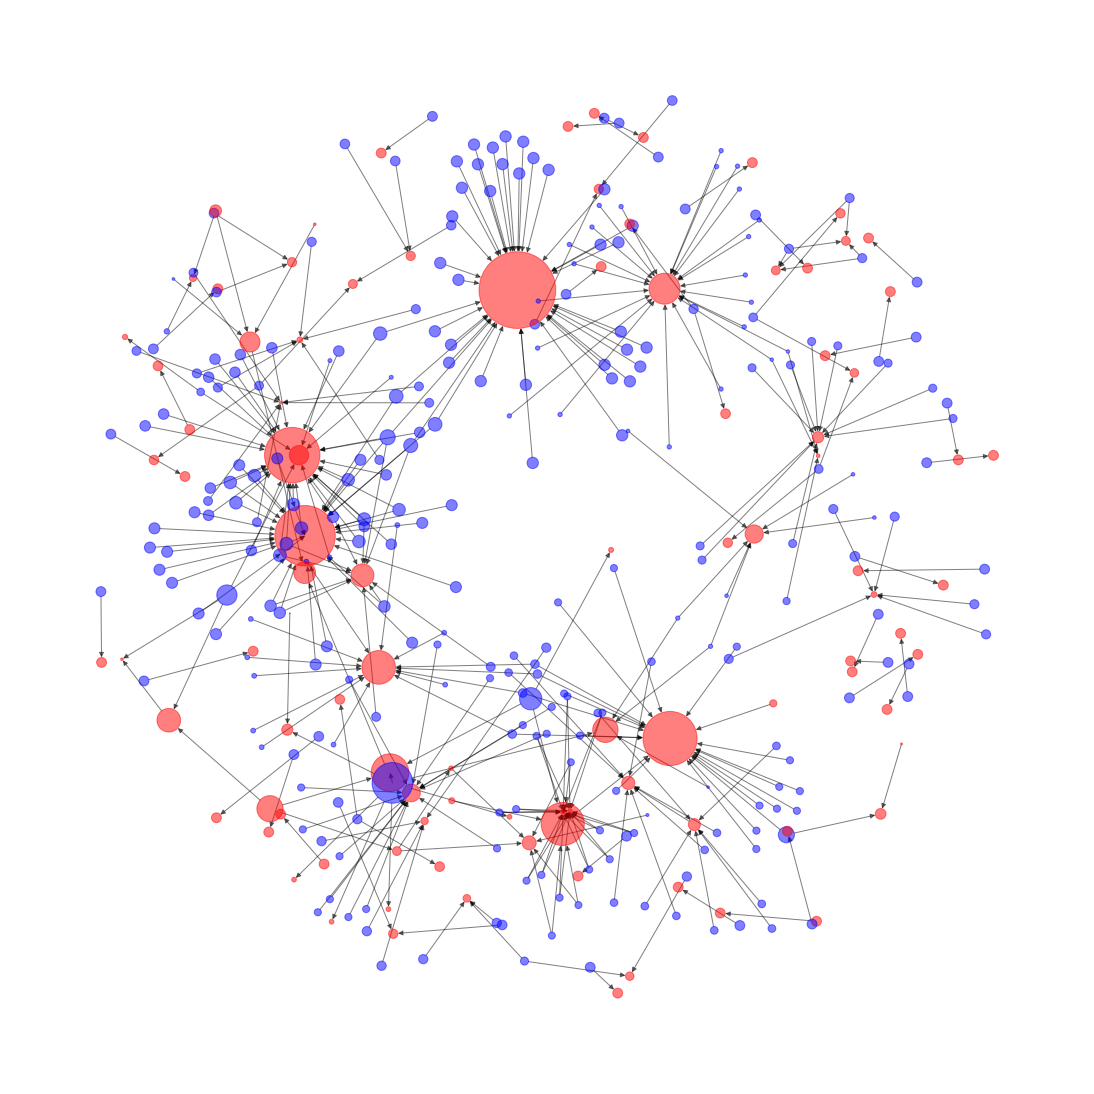

In [13]:
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')

plt.figure(figsize=(15, 15))

global_eff = nx.global_efficiency(G)

vulnerability = []
for node in G.nodes():
    local_eff = nx.global_efficiency(G.subgraph(set(G)-{node}))
    vulnerability.append([abs(global_eff - local_eff), node])
    
node_sizes = [v[0] * 500000 for v in vulnerability]

G = nx.DiGraph(G)
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

nx.draw(G, pos, node_size=node_sizes, node_color=colors, alpha = 0.5, edge_color='black')

In [14]:
vulnerability_df = pd.DataFrame(vulnerability, columns=['Vulnerability','sourceTaxonSpeciesName'])
vulnerability_df.sort_values(by='Vulnerability', ascending=False)

,Vulnerability,sourceTaxonSpeciesName
65,0.011774,Castanea dentata
18,0.007317,Fraxinus americana
48,0.006134,Fraxinus pennsylvanica
1,0.005860,Anguilla anguilla
85,0.003711,Galeorhinus galeus
...,...,...
338,0.000015,Panthera tigris
360,0.000013,Carcharhinus longimanus
341,0.000013,Harpia harpyja
77,0.000008,Huso huso


<AxesSubplot:title={'center':'Espécies que mais influênciam na eficiencia global'}, ylabel='sourceTaxonSpeciesName'>

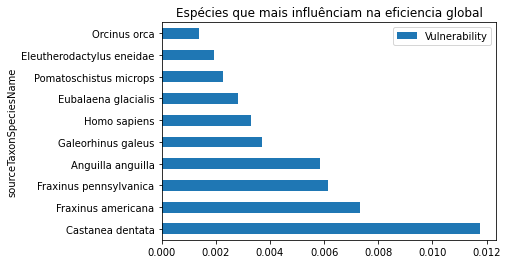

In [16]:
vulnerability_df = vulnerability_df.set_index('sourceTaxonSpeciesName')
vulnerability_df.sort_values(by='Vulnerability', ascending=False)[:10].plot.barh(title='Espécies que mais influênciam na eficiencia global')

In [18]:
vulnerability_df['sourceTaxonSpeciesName'] = vulnerability_df.index
vulnerability_df = vulnerability_df.sort_values(by='Vulnerability', ascending=False)
vulnerability_df.index = np.arange(0, len(vulnerability_df))
vulnerability_df

,Vulnerability,sourceTaxonSpeciesName
0,0.011774,Castanea dentata
1,0.007317,Fraxinus americana
2,0.006134,Fraxinus pennsylvanica
3,0.005860,Anguilla anguilla
4,0.003711,Galeorhinus galeus
...,...,...
371,0.000015,Panthera tigris
372,0.000013,Carcharhinus longimanus
373,0.000013,Harpia harpyja
374,0.000008,Huso huso


In [19]:
vulnerability_df["sourceTaxonKingdomName"] = 'NaN'
i = 0
while(i < len(vulnerability_df)):
    try:
        vulnerability_df.loc[i,"sourceTaxonKingdomName"] = interactions_df.query('sourceTaxonSpeciesName == "' + vulnerability_df["sourceTaxonSpeciesName"][i] + '" & sourceTaxonKingdomName == sourceTaxonKingdomName').head(1).sourceTaxonKingdomName.item()
    except:
        pass
    i+=1
vulnerability_df = vulnerability_df[:5]
vulnerability_df

,Vulnerability,sourceTaxonSpeciesName,sourceTaxonKingdomName
0,0.011774,Castanea dentata,Plantae
1,0.007317,Fraxinus americana,Plantae
2,0.006134,Fraxinus pennsylvanica,Plantae
3,0.005860,Anguilla anguilla,Animalia
4,0.003711,Galeorhinus galeus,Animalia


In [20]:
kingdom_source = vulnerability_df.sourceTaxonKingdomName.value_counts()
kingdom_source

Plantae     3
Animalia    2
Name: sourceTaxonKingdomName, dtype: int64

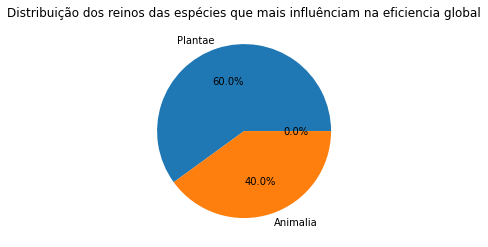

In [42]:
def pie_plot_others(title, series, agg_after):
    others_row = pd.Series({'Others': series[agg_after:].sum()})
    plot_df = pd.concat([series[:agg_after], others_row])
    plot_df.plot.pie(title=title, autopct='%1.1f%%', ylabel='')

pie_plot_others('Distribuição dos reinos das espécies que mais influênciam na eficiencia global', kingdom_source, 3)

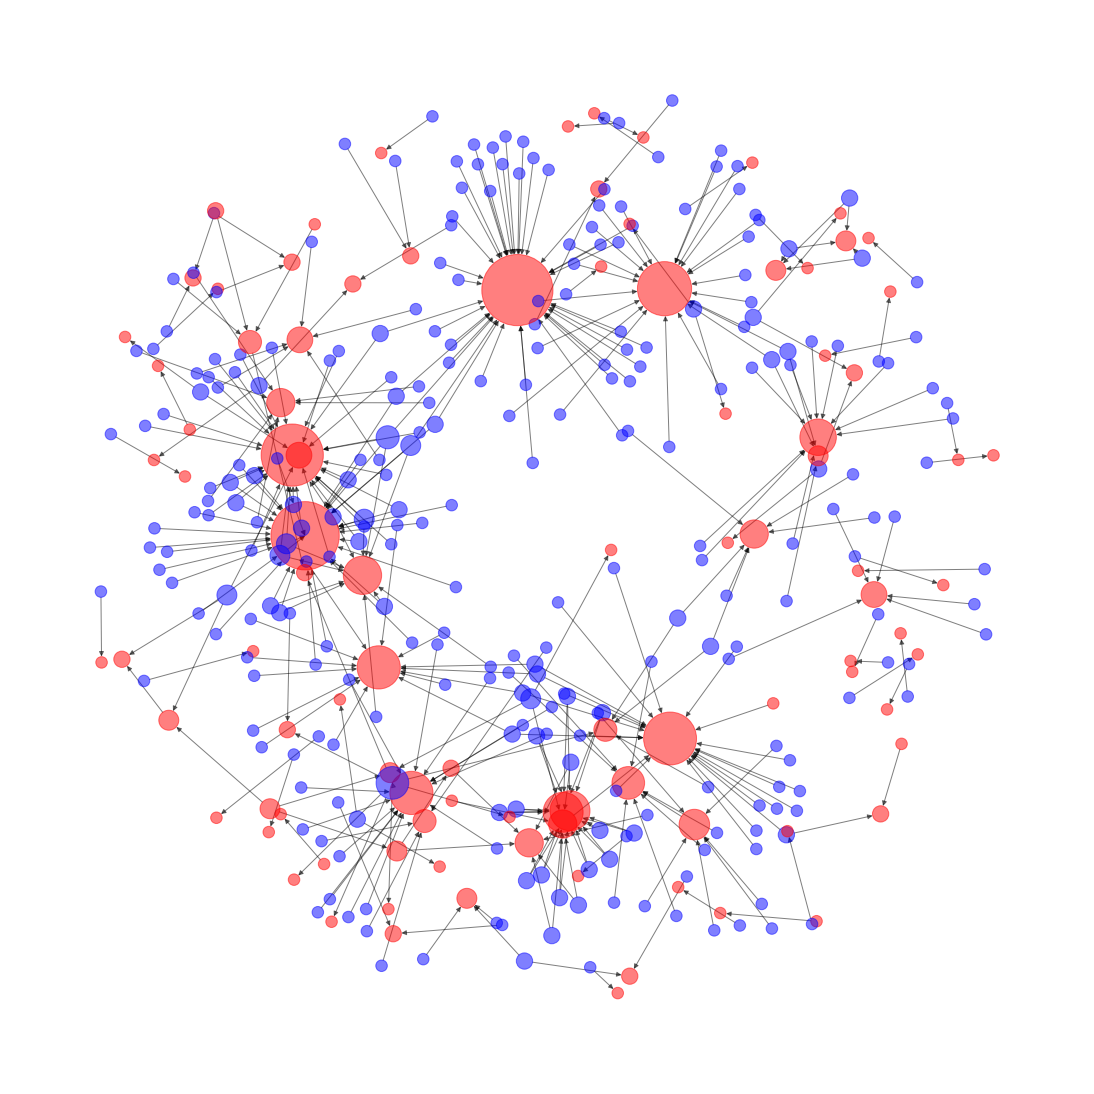

In [28]:
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')
G = nx.DiGraph(G)

plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

degree_centrality=nx.degree_centrality(G)

nx.set_node_attributes(G, degree_centrality, 'degree_centr')
node_sizes = [v * 50000 for v in degree_centrality.values()]

nx.draw(G, pos, node_size=node_sizes, node_color=colors, alpha = 0.5, edge_color='black')

In [29]:
degree_df = pd.DataFrame.from_dict(degree_centrality, columns=['Degree'], orient='index')
degree_df.sort_values(by='Degree', ascending=False)

,Degree
Castanea dentata,0.101333
Fraxinus americana,0.093333
Fraxinus pennsylvanica,0.077333
Eleutherodactylus eneidae,0.058667
Anguilla anguilla,0.056000
...,...
Corvus albus,0.002667
Foudia aldabrana,0.002667
Hypsipetes madagascariensis,0.002667
Pteropus aldabrensis,0.002667


<AxesSubplot:title={'center':'Espécies com os maiores graus de centralidade'}>

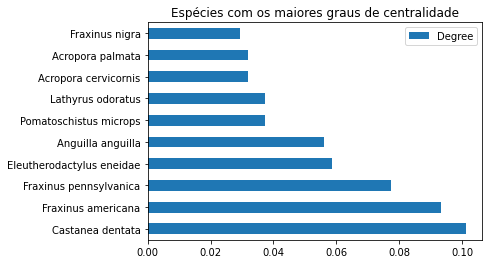

In [30]:
degree_df.sort_values(by='Degree', ascending=False)[:10].plot.barh(title='Espécies com os maiores graus de centralidade')

In [31]:
degree_df['sourceTaxonSpeciesName'] = degree_df.index
degree_df = degree_df.sort_values(by='Degree', ascending=False)
degree_df.index = np.arange(0, len(degree_df))
degree_df

,Degree,sourceTaxonSpeciesName
0,0.101333,Castanea dentata
1,0.093333,Fraxinus americana
2,0.077333,Fraxinus pennsylvanica
3,0.058667,Eleutherodactylus eneidae
4,0.056000,Anguilla anguilla
...,...,...
371,0.002667,Corvus albus
372,0.002667,Foudia aldabrana
373,0.002667,Hypsipetes madagascariensis
374,0.002667,Pteropus aldabrensis


In [32]:
degree_df["sourceTaxonKingdomName"] = 'NaN'
i = 0
while(i < len(degree_df)):
    try:
        degree_df.loc[i,"sourceTaxonKingdomName"] = interactions_df.query('sourceTaxonSpeciesName == "' + degree_df["sourceTaxonSpeciesName"][i] + '" & sourceTaxonKingdomName == sourceTaxonKingdomName').head(1).sourceTaxonKingdomName.item()
    except:
        pass
    i+=1
degree_df = degree_df[:5]
degree_df

,Degree,sourceTaxonSpeciesName,sourceTaxonKingdomName
0,0.101333,Castanea dentata,Plantae
1,0.093333,Fraxinus americana,Plantae
2,0.077333,Fraxinus pennsylvanica,Plantae
3,0.058667,Eleutherodactylus eneidae,Animalia
4,0.056000,Anguilla anguilla,Animalia


In [33]:
kingdom_source = degree_df.sourceTaxonKingdomName.value_counts()
kingdom_source

Plantae     3
Animalia    2
Name: sourceTaxonKingdomName, dtype: int64

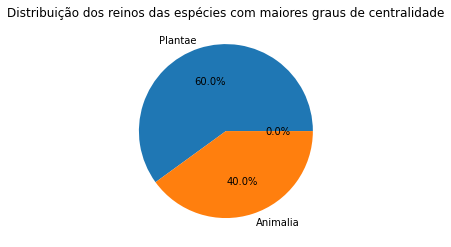

In [34]:
pie_plot_others('Distribuição dos reinos das espécies com maiores graus de centralidade', kingdom_source, 3)

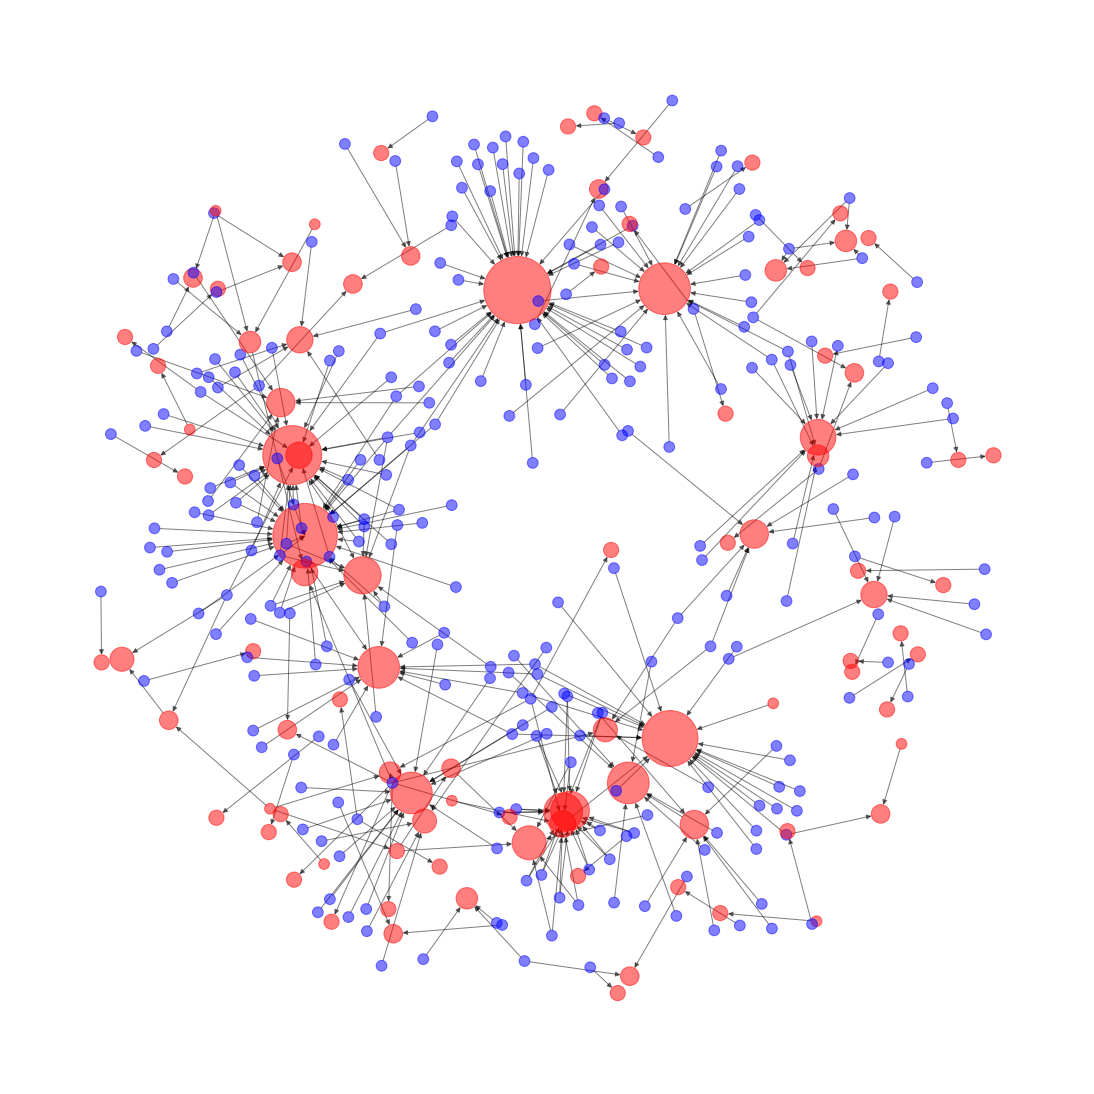

In [35]:
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')
G = nx.DiGraph(G)

plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

degree_centrality=nx.katz_centrality(G,1)

nx.set_node_attributes(G, degree_centrality, 'degree_centr')
node_sizes = [v * 10000 for v in degree_centrality.values()]

nx.draw(G, pos, node_size=node_sizes, node_color=colors, alpha = 0.5, edge_color='black') # Exibe o grafo

In [36]:
degree_df = pd.DataFrame.from_dict(degree_centrality, columns=['Degree'], orient='index')
degree_df.sort_values(by='Degree', ascending=False)

,Degree
Castanea dentata,0.452419
Fraxinus americana,0.417618
Fraxinus pennsylvanica,0.348015
Anguilla anguilla,0.313213
Eleutherodactylus eneidae,0.266811
...,...
Ardea cinerea,0.011600
Carcinus maenas,0.011600
Boletinellus merulioides,0.011600
Dryocopus pileatus,0.011600


<AxesSubplot:title={'center':'Espécies com as maiores centralidades de autovetor'}>

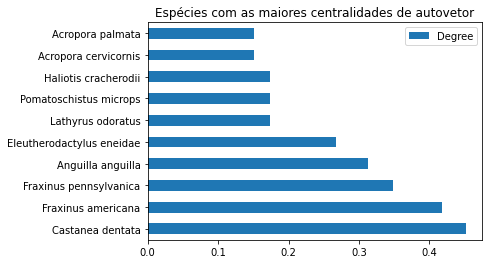

In [37]:
degree_df.sort_values(by='Degree', ascending=False)[:10].plot.barh(title='Espécies com as maiores centralidades de autovetor')

In [38]:
degree_df['sourceTaxonSpeciesName'] = degree_df.index
degree_df = degree_df.sort_values(by='Degree', ascending=False)
degree_df.index = np.arange(0, len(degree_df))
degree_df

,Degree,sourceTaxonSpeciesName
0,0.452419,Castanea dentata
1,0.417618,Fraxinus americana
2,0.348015,Fraxinus pennsylvanica
3,0.313213,Anguilla anguilla
4,0.266811,Eleutherodactylus eneidae
...,...,...
371,0.011600,Ardea cinerea
372,0.011600,Carcinus maenas
373,0.011600,Boletinellus merulioides
374,0.011600,Dryocopus pileatus


In [39]:
degree_df["sourceTaxonKingdomName"] = 'NaN'
i = 0
while(i < len(degree_df)):
    try:
        degree_df.loc[i,"sourceTaxonKingdomName"] = interactions_df.query('sourceTaxonSpeciesName == "' + degree_df["sourceTaxonSpeciesName"][i] + '" & sourceTaxonKingdomName == sourceTaxonKingdomName').head(1).sourceTaxonKingdomName.item()
    except:
        pass
    i+=1
degree_df = degree_df[:5]
degree_df

,Degree,sourceTaxonSpeciesName,sourceTaxonKingdomName
0,0.452419,Castanea dentata,Plantae
1,0.417618,Fraxinus americana,Plantae
2,0.348015,Fraxinus pennsylvanica,Plantae
3,0.313213,Anguilla anguilla,Animalia
4,0.266811,Eleutherodactylus eneidae,Animalia


In [40]:
kingdom_source = degree_df.sourceTaxonKingdomName.value_counts()
kingdom_source

Plantae     3
Animalia    2
Name: sourceTaxonKingdomName, dtype: int64

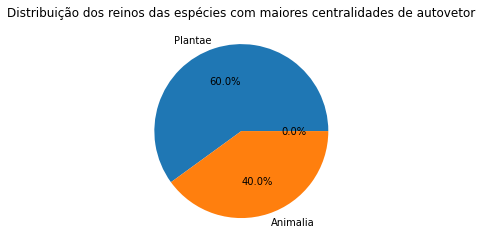

In [41]:
pie_plot_others('Distribuição dos reinos das espécies com maiores centralidades de autovetor', kingdom_source, 3)